In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

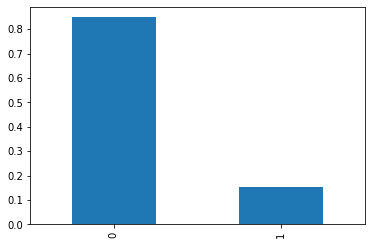

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


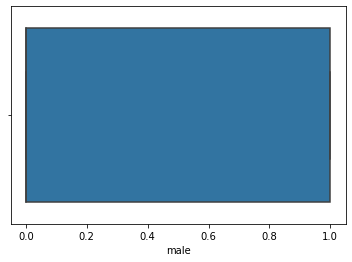

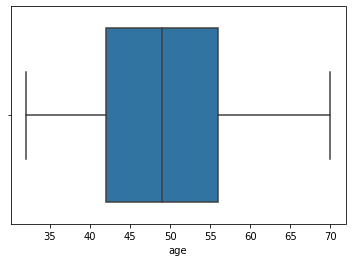

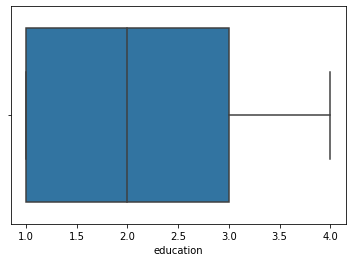

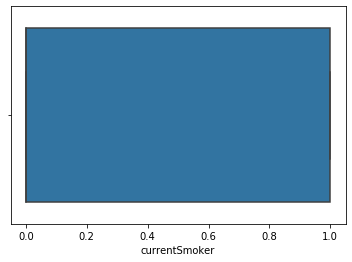

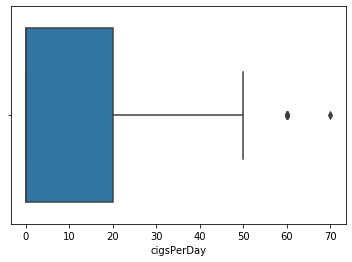

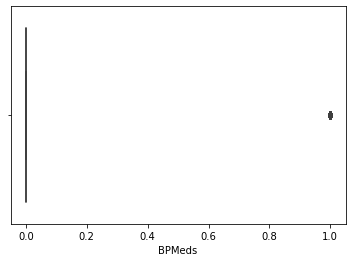

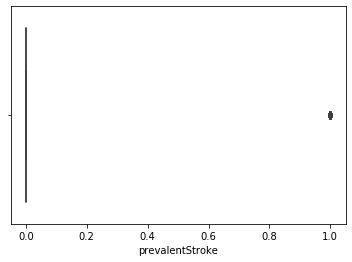

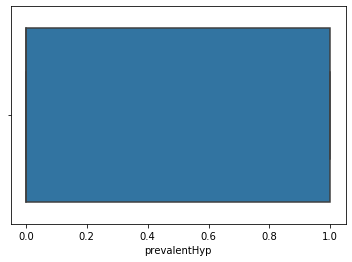

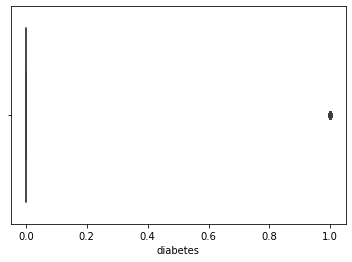

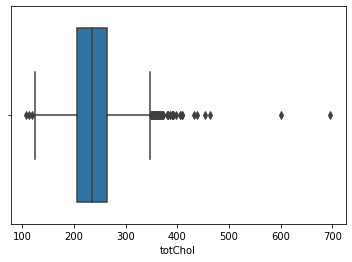

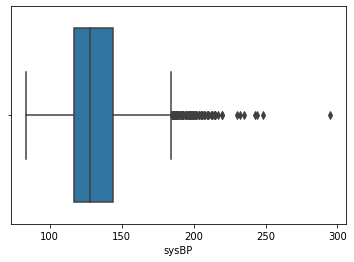

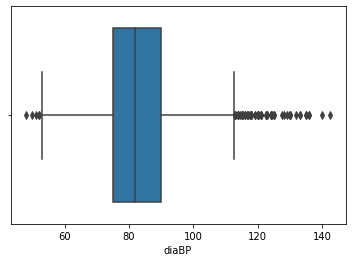

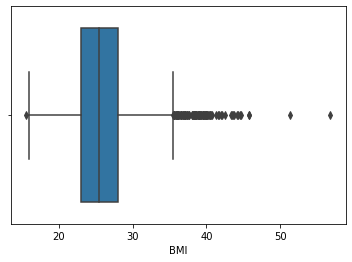

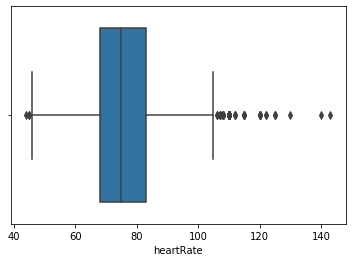

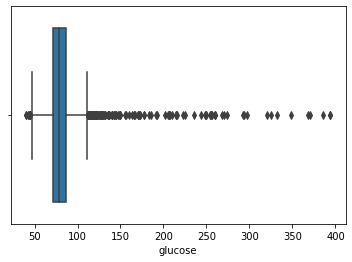

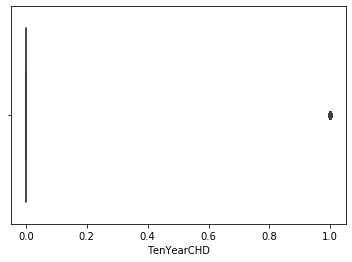

In [6]:
df =pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\classification\day1\US_Heart_Patients.csv')

df.head()

df.TenYearCHD.value_counts()

df.TenYearCHD.value_counts(normalize = True)

df.TenYearCHD.value_counts(normalize = True).plot(kind = 'bar')
plt.show()

df.info()

df.isna().sum()

df.fillna(method ='ffill',inplace =True)

#cols = [i for i in df.select_dtypes!='object']
for j in df.columns:
    sns.boxplot(df[j])
    #df[j].plot(kind ='boxplot')
    plt.show()

In [4]:
#sns.pairplot(df, hue = 'TenYearCHD')

In [ ]:
df.head()

In [ ]:
y = df.TenYearCHD
x = df.drop(columns ='TenYearCHD')

In [ ]:
%%time
from sklearn.model_selection import train_test_split

In [ ]:
%%time

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size =0.3,random_state =1)

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True,solver ='liblinear')
lr.fit(X_train,y_train)


In [ ]:
%%time

y_train_prob = lr.predict_proba(X_train)[:,1]
y_train_pred = lr.predict(X_train)


In [ ]:
y_train_prob

In [ ]:
y_train_pred

# evaluating model on train data

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

In [ ]:
confusion_matrix(y_train,y_train_pred)

In [ ]:
ax =sns.heatmap(confusion_matrix(y_train,y_train_pred),annot =True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
accuracy_score(y_train,y_train_pred)

In [ ]:
print(classification_report(y_train,y_train_pred))

# ROC

In [ ]:
roc_auc_score(y_train,y_train_prob)

In [ ]:
fpr, tpr, thresholds  =roc_curve(y_train,y_train_prob)

In [ ]:
thresholds[0] = thresholds[0]-1

In [ ]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.plot(fpr,thresholds)
plt.show()

# evaluating model on test data

In [ ]:
#X_train, X_test, y_train, y_test
y_test_prob = lr.predict_proba(X_test)[:,1]
y_test_pred = lr.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_test_pred)

In [ ]:
accuracy_score(y_test,y_test_pred)

In [ ]:
roc_auc_score(y_test,y_test_prob)

In [ ]:
fpr, tpr, thresholds  = roc_curve(y_test,y_test_prob)

In [ ]:
thresholds[0] = thresholds[0]-1

In [ ]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.plot(fpr,thresholds)
plt.show()

In [ ]:
sns.distplot(fpr)
sns.distplot(tpr)

In [ ]:
ytest_probb.columns

In [ ]:
ytest_probb = pd.DataFrame([y_test.values,y_test_prob]).T
ytest_probb.head()
df0 = ytest_probb[ytest_probb[0]==0.0]
df1 =ytest_probb[ytest_probb[0]==1.0]


In [ ]:
print(df0.head()),print(df1.head())

In [ ]:
sns.distplot(df0[1])
sns.distplot(df1[1])
plt.show()

In [ ]:
import matplotlib
matplotlib.__version__

In [ ]:
pip install matplotlib==3.1.1